In [2]:
import numpy as np

eps_N = -3
eps_G = -4
eps_A = -1
eps_NA = -1

eps_G_max = eps_N - np.log((1+np.exp(-eps_A)+np.exp(-eps_A-eps_NA))/(1+np.exp(-eps_A)))
eps_G_max2 = eps_N - np.log(np.exp(-eps_NA)-1)
print(-eps_N, -eps_G_max, -eps_G_max2)

3 4.094344276926158 3.541324854612918


0.26401558741392617 0.2640155874139923


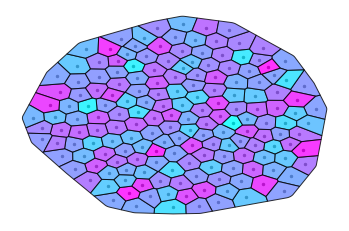

In [6]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh

Pos = np.array(pd.read_csv('testOrganoid.csv'))
FVmesh = initializeFVmesh(Pos)

def connectivity(FVmesh):
    X = np.zeros([FVmesh.nofCells, FVmesh.nofCells])

    for i in range(FVmesh.nofCells):
        for j in FVmesh.Neigh[i]:
            X[i,j] += 1/len(FVmesh.Neigh[i])
 
    return X


X = connectivity(FVmesh)
eta_n = np.exp(3)
eta_g = np.exp(4)
eta_a = np.exp(1)
eta_na = np.exp(1)

A = np.eye(FVmesh.nofCells) + eta_a*X
b = np.dot(X, np.ones(FVmesh.nofCells))*(1-1/eta_g)

a = np.linalg.solve(A, b)
g = np.linalg.solve(X, a)

print(min(g), max(g))
FVmesh.plot(g)

In [9]:
from sympy import *
x, a = symbols('x, a')

p = x*a/(1+(x)*a)
integrate(p, a)

x*(a/x - log(a*x + 1)/x**2)

2.718281828459045


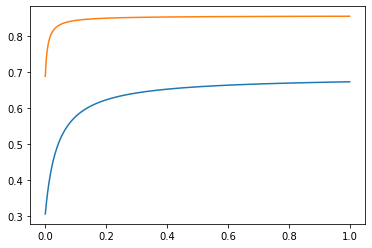

In [62]:
import numpy as np
import matplotlib.pyplot as plt

eta_a = np.exp(4)
eta_b = np.exp(3)
eta_c = np.exp(2)
eta = np.exp(1)

b = 0.2
c = 0.3
a = np.linspace(0,1,1000)

eta2 = eta#1/(eta_a*a)*((1+eta_a*a)**2/(1+eta_b*b + eta_a*a) - 1)  #np.exp(-3)
print(eta2)

p_C1 = eta_c*c*(1+eta_a*a)/(1 + eta_c*c*(1+eta_a*a) + eta_b*b + eta_a*a)
p_C2 = eta_c*c*(1+eta_a*eta2*a)/(1 + eta_c*c*(1+eta_a*eta2*a) + eta_a*a)
#p_C3 = eta_c*c/(1 + eta_c*c)

plt.plot(a, p_C1)
plt.plot(a, p_C2)
#plt.plot(c, p_C3, 'k--')

False


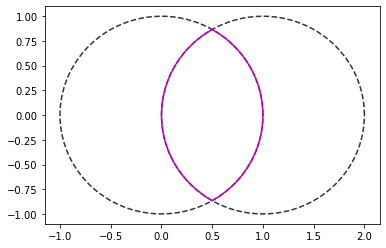

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

TE1 = lambda theta: np.array([1*np.cos(theta),1*np.sin(theta)]).T
TE2 = lambda theta: np.array([1*np.cos(theta) + 1,1*np.sin(theta)]).T

TEvals1 = TE1(np.linspace(0,2*np.pi, 100))
TEpoly1 = Polygon(TEvals1)

TEvals2 = TE2(np.linspace(0,2*np.pi, 100))
TEpoly2 = Polygon(TEvals2)

poly = TEpoly1.intersection(TEpoly2)
print(poly.is_empty)


x,y = TEpoly1.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = TEpoly2.exterior.xy
plt.plot(x,y, 'k--', alpha = 0.8)

x,y = poly.exterior.xy
plt.plot(x,y, 'm')

In [29]:
from scipy.spatial.distance import cdist

a = np.random.rand(6)

print(a, np.maximum(a, 1))

[0.51356955 0.9835461  0.15751447 0.63753187 0.30684477 0.88062042] [1. 1. 1. 1. 1. 1.]


In [48]:
a=np.linspace(0,100,11)
a

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

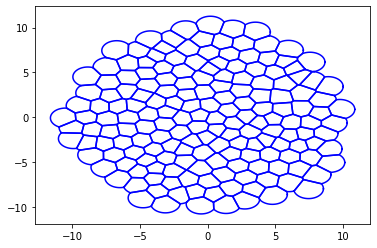

In [81]:
import numpy as np
import pandas as pd
from FVmesh import initializeFVmesh
import matplotlib.pyplot as plt

Pos = np.array(pd.read_csv('testOrganoid.csv'))
Radius = np.ones(len(Pos))*1.1
FVmesh = initializeFVmesh(Pos, Radius=Radius)

for i in range(len(FVmesh.Poly)):
    x,y = FVmesh.Poly[i].exterior.xy
    plt.plot(x,y,color='b')
#plt.scatter(FVmesh.Poly[:,0],FVmesh.Poly[:,1])